In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from urllib import request
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



def cv2pil(cv2_img):
    if len(cv2_img.shape) == 2:
        return Image.fromarray(cv2_img)
    
    elif len(cv2_img.shape) == 3:
        return Image.fromarray(cv2_img[:,:,::-1])
    
    else:
        print("格式有问题")
        
        return cv2_img


def pil2cv(pil_img):
    return cv2.cvtColor(np.asarray(pil_img),cv2.COLOR_RGB2BGR)


def url2img(url_path):
    resp = request.urlopen(url_path)
    image = np.asarray(bytearray(resp.read()), dtype="uint8") ### 字节流数组
    img = cv2.imdecode(image, 1)
    
    return img


### 直方图

In [2]:
import pandas as pd

def show_piexl(cv2_img):
    """ 显示像素 """
    cv2_img = cv2.resize(cv2_img,None, fx=0.05, fy=0.05) ###缩放图像
    gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    df = pd.DataFrame(gray)
    df = df.style.set_properties(**{'font-size':'1pt'}).background_gradient('Greys')
    return df

def get_pixvalue(cv2_img):  # 单张图片的信息
    h, w, c = cv2_img.shape
    img_b = cv2_img[:, :, 0].astype(np.int16)
    img_g = cv2_img[:, :, 1].astype(np.int16)
    img_r = cv2_img[:, :, 2].astype(np.int16)
    img_sum = img_b + img_g + img_r
    return h, w, img_sum, img_b, img_g, img_r

def piexlDifvalue(imgArrs):  
    # 图像大小必须相等
    # 两张三通道图片的每个像素的差
    img_inf = []
    for img in imgArrs:
        h, w, img_sum, img_b, img_g, img_r = get_pixvalue(img)
        img_inf.append([h, w, img_sum, img_b, img_g, img_r])

    if img_inf[0][:2] == img_inf[1][:2]:
        return img_inf[0][0], img_inf[0][1], abs(img_inf[0][2] - img_inf[1][2])

    else:
        print('size is not the same!!')
        exit(0)
        return None

def show_hist(cv2_img):
    """ 显示直方图 """
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([cv2_img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.legend()
        plt.xlim([0,256])
        plt.xticks([]), plt.yticks([])
    plt.show()

    
    
def showPiexlDist(imgArrs):
    # print(arg)
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    
    h, w, img_sum = piexlDifvalue(imgArrs)
    
    x = np.arange(0, w, 1)
    y = np.arange(0, h, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(Y.shape, dtype=np.uint16)  # 新建一个元素全为0单shape和X,Y都一样的z
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Z[i][j] = img_sum[i][j]

    ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                     cmap=plt.get_cmap('rainbow'))
    # 绘制等高线，这个映射必须是等高线方向有差值,cmap/cm = color map
    # ax1.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
    plt.show()


def get_and(cv2_img, blur_size = 10, kernel_size = 10, valMin = 127):
    gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, (blur_size, blur_size))
    k=np.ones((kernel_size, kernel_size),np.uint8)
    _, th = cv2.threshold(blur, valMin, 255, cv2.THRESH_OTSU)
    open = cv2.morphologyEx( th, cv2.MORPH_OPEN, k)
    and_img = cv2.bitwise_and(cv2_img, cv2_img, mask=open)
    
    return and_img


# url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
url_path = 'https://tse1-mm.cn.bing.net/th/id/R-C.eca409afb379667803e5c7b863b62269?rik=xHhWbH%2fwZDD5fg&riu=http%3a%2f%2fqimg.hxnews.com%2f2017%2f1226%2f1514251867325.jpg&ehk=xZUsr9BPCeTJVlHScwTF73NV5Psqdghnj8li8smG%2fW8%3d&risl=&pid=ImgRaw&r=0'
url_path= 'https://uploadfile.huiyi8.com/2015/1120/20151120035805807.jpg'


ori_img = url2img(url_path)
# ori_img = cv2.imread('img/1.jpg')
# ori_img = cv2.resize(ori_img,None, fx=0.5, fy=0.5)
# # show_hist(ori_img)
# cv2pil(ori_img)

# ori_img = cv2.imread('img/1.jpg')
# ori_img = cv2.resize(ori_img, None, fx=0.5, fy=0.5)

# bg_img = get_and(ori_img, blur_size = 3, kernel_size = 1, valMin = 127)
# showPiexlDist((bg_img, ori_img))
# cv2pil(bg_img)
# cv2pil(ori_img)



#### hsv 饱和度增强

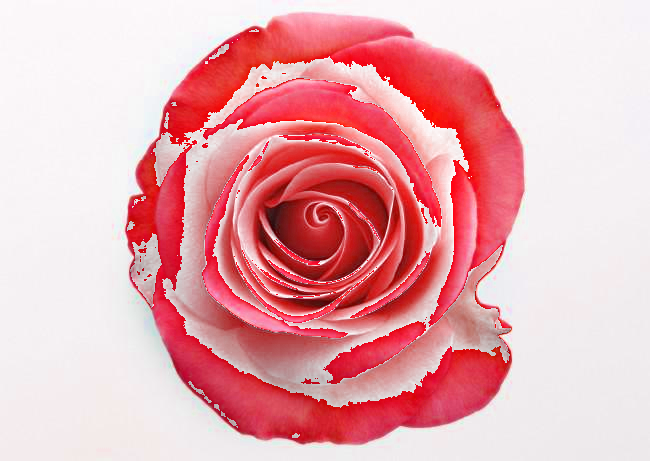

In [8]:

hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

s2 = s*2
# s2[s2> 250] = 250
# s2[:, :, 2][s2[:, :, 1] > 1] = 1

hsv2 = cv2.merge([h,s2,v])
src = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
Image.fromarray(cv2.cvtColor(src,cv2.COLOR_BGR2RGB)) 

### 直方图均衡化

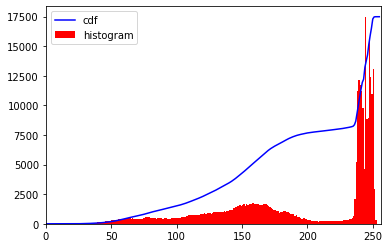

In [4]:
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
#flatten() 将数组变成一维
hist,bins = np.histogram(img.flatten(),256,[0,256])
# 计算累积分布图
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [5]:
# 构建 Numpy 掩模数组，cdf 为原数组，当数组元素为 0 时，掩盖（计算时被忽略）。
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 对被掩盖的元素赋值，这里赋值为 0
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]


#### 2D 直方图

(<matplotlib.axes._subplots.AxesSubplot at 0x1d55eb639e8>,
 <matplotlib.image.AxesImage at 0x1d55f82d320>)

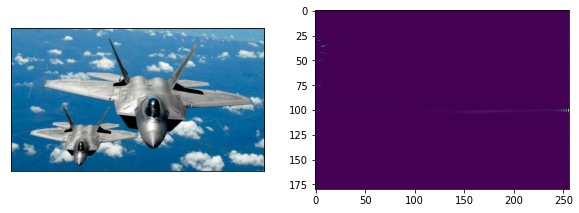

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ori_img = cv2.imread("img/1.jpg") 
hsv = cv2.cvtColor(ori_img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(ori_img[:,:,::-1]), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(hist, interpolation = 'nearest')

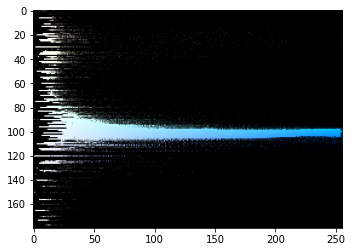

In [7]:
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:,:,0] = h
hsv_map[:,:,1] = s
hsv_map[:,:,2] = 255
hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_HSV2BGR)
hist_scale = 10
def set_scale(val):
    global hist_scale
    hist_scale = val

frame = ori_img.copy()
small = cv2.pyrDown(frame)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
dark = hsv[:,:,2] < 32
hsv[dark] = 0
h = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
h = np.clip(h*0.005*hist_scale, 0, 1)
vis = hsv_map*h[:,:,np.newaxis] / 255.0

plt.imshow(vis[:,:,::-1])

In [8]:
import numpy as np

def hist2d(cv2_img):
    
    def callback(val):
        global hist_scale
        hist_scale = val
    
    hsv_map = np.zeros((180, 256, 3), np.uint8)
    h, s = np.indices(hsv_map.shape[:2])
    hsv_map[:,:,0] = h
    hsv_map[:,:,1] = s
    hsv_map[:,:,2] = 255
    hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_HSV2BGR)
    hist_scale = 10
    
    cv2.namedWindow("hist2d")
    cv2.resizeWindow("hist2d", 640, 240)
    cv2.createTrackbar('scale', 'hist2d', hist_scale, 32, callback)
    
    while True:
        text = f"val:{hist_scale}"
        frame = cv2_img.copy()
        small = cv2.pyrDown(frame)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        cv2.putText(hsv, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        dark = hsv[:,:,2] < 32
        hsv[dark] = 0
        h = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
        h = np.clip(h*0.005*hist_scale, 0, 1)
        vis = hsv_map*h[:,:,np.newaxis] / 255.0
        
        # vis = vis*255.0
        # vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)
        # print(vis.shape)
        # img = np.hstack((ori_img, vis))
        cv2.imshow('hist2d', vis)
        cv2.waitKey(1)
        

hist2d(ori_img)

KeyboardInterrupt: 